In [184]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#importing libraries

# Pandas: Powerful data structures for data analysis, time series, and statistics. Home-page: http://pandas.pydata.org

In [259]:
datasets = pd.read_csv('Salary_Data.csv')

X = datasets.iloc[:, :-1].values
Y = datasets.iloc[:, 1].values
Y= np.reshape(Y,(30,1))

print (X.shape)

print (Z.shape)


(30, 1)
(30, 1)


In [260]:
# Splitting the dataset into the Training set and Test set

X_train = X[0:20]
X_test = X[20:]
Y_train = Y[0: 20]
Y_test = Y[20:]
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(20, 1) (10, 1) (20, 1) (10, 1)


In [274]:
# 임의의 1차함수 정의 y=Wx+b

W= np.random.rand (1,1)
b= np.random.rand (1)

print(W.shape, b.shape)


(1, 1) (1,)


In [262]:
#손실함수 E(W,b) 정의 x=input값 t= input 의 정답값
def loss_func(x,t):
    y=np.dot(x,W)+b   #dot product
    
    return (np.sum((t-y)**2))/(len(x))
    

In [263]:
#f라는 함수를 x라는 변수에 관하여 편미분 하는 function. x는 numpy 객체이어야함

def numerical_derivative(f,x):
    delta_x= 1e-4
    grad= np.zeros_like(x)
        
    #print ('debug 1. initial input variable =', x)
    #print ('debug 2. initial grad =', grad)
    #print ('====================================')
        
    it= np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])  
    
    # np.nditer:  Efficient multi-dimensional iterator object to iterate over arrays.
    # parameters ==================================================================================================
    # flags : sequence of str, optional
    # multi_index causes a multi-index, or a tuple of indices with one per iteration dimension, to be tracked.
    # op_flags :list of list of str, optional
    # readwrite indicates the operand will be read from and written to.
    
    
    while not it.finished:
        index= it.multi_index
        
        #print( 'debug 3. index =', index, 'x[index] =' , x[index])
        
        temp_val= x[index]
                  
        x[index]= float(temp_val) + delta_x    
         
        fx1= f(x)
        
        #print (f(x))
                
        x[index]= float(temp_val) - delta_x      
        
        fx2= f(x)
        
        #print(f(x))
        #print (fx1-fx2)
       
        
        grad[index]= (fx1-fx2)/(2*delta_x)
        
        #print ('debug 4. grad[index] =', grad[index])
        #print ('debug 5. grad =', grad)
        #print ('====================================')
        
        
        x[index]=temp_val
        
        it.iternext()
        
    return grad
        
              
        
    

In [264]:
# numerical_derivative 함수 예제

def func1(input_obj):
    
    w=input_obj[0,0]
    x=input_obj[0,1]
    y=input_obj[1,0]
    z=input_obj[1,1]
    
    return (w*x + x*y*z + 3*w + z* np.power(y,2))
            
input = np.array([[1.0,2.0], [3.0,4.0]])

numerical_derivative(func1, input)


array([[ 5., 13.],
       [32., 15.]])

In [265]:
# 유틸리티 함수들

def error_value(x,t):
    y=np.dot(x,W)+b   #dot product
    
    return (np.sum((t-y)**2))/(len(x))


#학습을 마친후 임의의 데이터에 대한 미래값 예측

def predict(x):
    predicted_value= np.dot(x,W)+b
    
    return predicted_value

len(X_train)

20

In [275]:
#손실함수가 최소가 될때까지 W (weight), b (bias) 를 학습
learning_rate = 1e-4

f= lambda x: (loss_func(X_train, Y_train))   #f(x)=loss_func(X_train, Y_train)

print('initial error value =', error_value(X_train, Y_train), 'initial W=', W, 'initial b=', b  )

for step in range (8001):
    W -= learning_rate* numerical_derivative(f,W)
    b -= learning_rate* numerical_derivative(f,b)
    
    if step%400 ==0:
        print ('step =', step, 'error_value =', error_value(X_train, Y_train), 'Weight =', W, 'Bias =', b)
        


initial error value = 3723757988.948723 initial W= [[0.12978386]] initial b= [0.06425752]
step = 0 error_value = 3700938226.3258867 Weight = [[46.4472258]] Bias = [11.89174546]
step = 400 error_value = 393025234.08300954 Weight = [[10511.10185575]] Bias = [2792.85483657]
step = 800 error_value = 128953353.44741762 Weight = [[13419.5435434]] Bias = [3744.82994189]
step = 1200 error_value = 106664037.02016675 Weight = [[14198.85973618]] Bias = [4179.61004696]
step = 1600 error_value = 103603804.84235623 Weight = [[14378.54702441]] Bias = [4466.91204436]
step = 2000 error_value = 102096837.92692867 Weight = [[14389.65487907]] Bias = [4710.94995469]
step = 2400 error_value = 100739052.22095159 Weight = [[14353.66051847]] Bias = [4941.11167999]
step = 2800 error_value = 99418501.77491574 Weight = [[14304.79531723]] Bias = [5165.69690488]
step = 3200 error_value = 98125803.22392116 Weight = [[14252.70244016]] Bias = [5387.06190134]
step = 3600 error_value = 96859708.23933783 Weight = [[14200

Weight = [[13651.88595418]] bias = [7867.90184407]


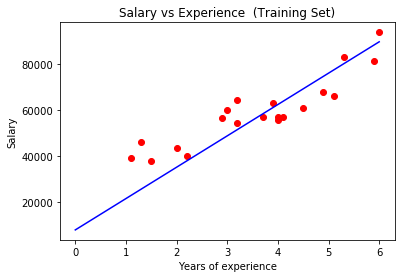

In [333]:
# Visualising the Training set results
# sklearn 안쓴 허접한 plotting 이긴 하지만 그래도 하긴했다..ㅎㅎ

def result_function(x):
    return W*x+b
print('Weight =', W,'bias =', b)

x_range = np.arange(0.0, 7.0)
x_range =np.reshape(x_range,(7,1))


plt.scatter(X_train, Y_train, color = 'red')

plt.plot(x_range, result_function(x_range), color = 'blue')
plt.title('Salary vs Experience  (Training Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

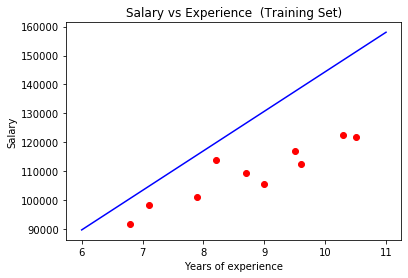

In [335]:
# Visualising the Test set results

x_range = np.arange(6.0, 12.0)
x_range =np.reshape(x_range,(6,1))

plt.scatter(X_test, Y_test, color = 'red')
plt.plot(x_range, result_function(x_range), color = 'blue')
plt.title('Salary vs Experience  (Training Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
#느낀점.. data 를 x=1~6 을 train 데이터로 x=6~11 을 test 데이터로 하니까 fitting 이 잘 안된다.
#더 많은 데이터로, 그리고 넓은 영역에서 random 하게 분포한 데이터를 학습시키는게 좋아보인다..